# Notebook 기본 세팅

In [1]:
# Constant 선언

# 프로젝트 루트 디렉토리를 식별하기 위한 마커 파일 이름
ROOT_MARKER = "pyproject.toml"

# 한글 표시를 위한 나눔바른고딕 폰트 파일 이름
# matplotlib 의 font_manager 에 실제 폰트 파일의 위치를 넣어주어야 한다.
KOREAN_FONT_FILE = "NanumBarunGothic.ttf"

# matplotlib 에서는 font-family 의 이름으로 font 를 설정한다.
# 그래서 font 파일 그 자체가 아니라, 그 파일의 family 이름을 적어준다.
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 참고
# Font Family 와 Font File 의 차이는,
# Font Family 는 비슷한 디자인 특성을 공유하는 글꼴 그룹을 의미한다.
#
# 예를 들어 '나눔바른고딕' 폰트 패밀리는 일반(Regular), 굵게(Bold), 기울임(Italic) 등 여러 스타일을 포함할 수 있다.
# 반면, 폰트 파일(.ttf, .otf 등)은 이러한 폰트의 하나의 스타일이 저장된 실제 파일이다.
#
# 이 프로젝트에서는 폰트 용량을 줄이기 위해 일반(Regular) 인 NanumBarunGothic.ttf 만 사용한다.

In [2]:
# 프로젝트 root 를 sys.path 에 추가해서 import 구문을 사용하기 쉽게
from pathlib import Path


def find_project_root() -> Path:
    """
    pyproject.toml 파일을 기준으로 루트 디렉토리를 찾는다.
    :return: Path: 프로젝트 루트 디렉토리 경로
    """

    current_path = Path().resolve()

    while current_path != current_path.parent:
        if (current_path / ROOT_MARKER).exists():
            return current_path

        current_path = current_path.parent

    raise FileNotFoundError("프로젝트 루트 디렉토리를 찾을 수 없습니다.")


ROOT_DIR = find_project_root()
DATA_DIR = ROOT_DIR / "data"

In [3]:
# matplotlib 의 한글 font 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


FONTS_DATA_DIR = DATA_DIR / "fonts"


def setup_korean_font():
    font_path = FONTS_DATA_DIR / KOREAN_FONT_FILE
    fm.fontManager.addfont(font_path)

    # 폰트 설정
    plt.rcParams["font.family"] = KOREAN_FONT_FAMILY
    plt.rcParams["axes.unicode_minus"] = False


setup_korean_font()

# Document Image Dataset 사용해보기

In [4]:
from src.util.helper import fix_random_seed


fix_random_seed(4321)

In [5]:
from src.data.datasets import DocumentImageSet

## Train 용 데이터셋 만들어보기

In [6]:
from torchvision import transforms


train_dataset = DocumentImageSet.create_train_dataset(
    img_transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    )
)
print("총 class 수:", train_dataset.num_classes)
print("class mapper:", train_dataset.class_names)

총 class 수: 17
class mapper: {0: 'account_number', 1: 'application_for_payment_of_pregnancy_medical_expenses', 2: 'car_dashboard', 3: 'confirmation_of_admission_and_discharge', 4: 'diagnosis', 5: 'driver_lisence', 6: 'medical_bill_receipts', 7: 'medical_outpatient_certificate', 8: 'national_id_card', 9: 'passport', 10: 'payment_confirmation', 11: 'pharmaceutical_receipt', 12: 'prescription', 13: 'resume', 14: 'statement_of_opinion', 15: 'vehicle_registration_certificate', 16: 'vehicle_registration_plate'}


batch train image shape: torch.Size([4, 3, 224, 224])
batch train labels shape: torch.Size([4])


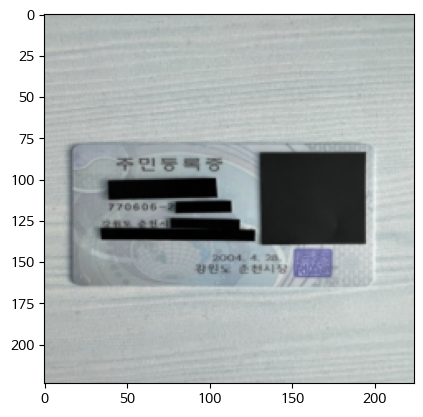

In [7]:
from torch.utils.data import DataLoader


data_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
for images, labels in data_loader:
    print("batch train image shape:", images.shape)
    print("batch train labels shape:", labels.shape)

    # sample image 확인
    plt.imshow(images[0].numpy().transpose(1, 2, 0))
    break

## Test 용 데이터셋 만들어보기

batch test image shape: torch.Size([4, 3, 224, 224])


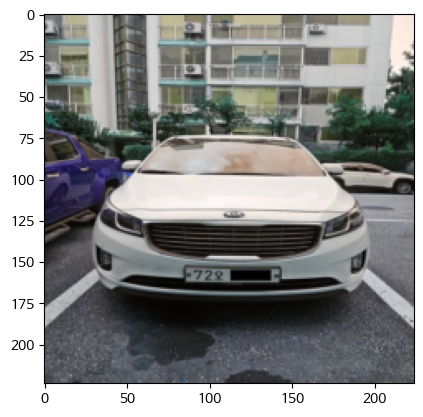

In [8]:
test_dataset = DocumentImageSet.create_test_dataset(
    img_transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    )
)

data_loader = DataLoader(train_dataset, batch_size=4, shuffle=False)
for images, _ in data_loader:
    print("batch test image shape:", images.shape)

    # sample image 확인
    plt.imshow(images[0].numpy().transpose(1, 2, 0))
    break

In [1]:
import timm

In [2]:
model_list = timm.list_models(pretrained=True)
len(model_list)

1637

In [21]:
convnext_models = [model_name for model_name in model_list if model_name.startswith("convnext")]
len(convnext_models)

91

In [22]:
efficientnet_models = [model_name for model_name in model_list if model_name.startswith("efficientnet")]
len(efficientnet_models)

21

In [23]:
regnet_models = [model_name for model_name in model_list if model_name.startswith("regnet")]
len(regnet_models)

72

In [24]:
resnet_models = [model_name for model_name in model_list if model_name.startswith("resnet")]
len(resnet_models)

130

In [25]:
efficientnet_models

['efficientnet_b0.ra4_e3600_r224_in1k',
 'efficientnet_b0.ra_in1k',
 'efficientnet_b1.ft_in1k',
 'efficientnet_b1.ra4_e3600_r240_in1k',
 'efficientnet_b1_pruned.in1k',
 'efficientnet_b2.ra_in1k',
 'efficientnet_b2_pruned.in1k',
 'efficientnet_b3.ra2_in1k',
 'efficientnet_b3_pruned.in1k',
 'efficientnet_b4.ra2_in1k',
 'efficientnet_b5.sw_in12k',
 'efficientnet_b5.sw_in12k_ft_in1k',
 'efficientnet_el.ra_in1k',
 'efficientnet_el_pruned.in1k',
 'efficientnet_em.ra2_in1k',
 'efficientnet_es.ra_in1k',
 'efficientnet_es_pruned.in1k',
 'efficientnet_lite0.ra_in1k',
 'efficientnetv2_rw_m.agc_in1k',
 'efficientnetv2_rw_s.ra2_in1k',
 'efficientnetv2_rw_t.ra2_in1k']

In [26]:
timm.data.resolve_model_data_config("efficientnetv2_rw_m")

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.875,
 'crop_mode': 'center'}

In [27]:
timm.list_models("test_mock", pretrained=True)

[]

In [44]:
import timm


def get_model_configs():
    """여러 모델의 실제 설정 확인"""
    models_to_check = [
        "convnext_tiny",  # input: 224
        "convnext_base_384_in22ft1k",  # input: 384!
        "efficientnet_b0",  # input: 224
        "efficientnet_b4",  # input: 380!
        "inception_v3",  # input: 299!
        "resnet50",  # input: 224
    ]

    for model_name in models_to_check:
        model = timm.create_model(model_name, pretrained=False)
        # default_cfg 확인
        if hasattr(model, "default_cfg"):
            cfg = model.default_cfg
            print(f"Input size: {cfg.get('input_size', 'N/A')}")
            print(f"Mean: {cfg.get('mean', 'N/A')}")
            print(f"Std: {cfg.get('std', 'N/A')}")
            print(f"Crop pct: {cfg.get('crop_pct', 'N/A')}")


get_model_configs()

Input size: (3, 224, 224)
Mean: (0.485, 0.456, 0.406)
Std: (0.229, 0.224, 0.225)
Crop pct: 0.95
{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95, 'crop_mode': 'center'}
Input size: (3, 384, 384)
Mean: (0.485, 0.456, 0.406)
Std: (0.229, 0.224, 0.225)
Crop pct: 1.0
{'input_size': (3, 384, 384), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 1.0, 'crop_mode': 'squash'}
Input size: (3, 224, 224)
Mean: (0.485, 0.456, 0.406)
Std: (0.229, 0.224, 0.225)
Crop pct: 0.875
{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875, 'crop_mode': 'center'}
Input size: (3, 320, 320)
Mean: (0.485, 0.456, 0.406)
Std: (0.229, 0.224, 0.225)
Crop pct: 0.875
{'input_size': (3, 320, 320), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.87

In [42]:
for model_name in efficientnet_models:
    config = timm.data.resolve_model_data_config(model_name)
    if config["input_size"][1] != 224:
        print(config)

In [46]:
from datetime import datetime

In [47]:
datetime.now().strftime("%Y-%m-%d%H:%M:%S")

'2025-07-0622:00:37'

In [49]:
datetime.now().strftime("%Y%m%d_%H%M%S")

'20250706_220347'